# modified_final_df_negativePricesRemoved.csv is final_df dataframe (final_df.csv) which 
## 1) Mean imputation has been done on its three weather columns (temperature, humidity, wind speed), so the dataframe is called modified_fnal_df (the csv file is modified_final_df.csv) and also 
## 2) all the rows with the negative price values is removed from it and still is called modified_final_df (with the csv file called modified_final_df_negativePricesRemoved.csv). 
### (Note: final_df is the merge of power,weather,price on DateTime feature)

In [1]:
import pandas as pd
filename = 'data/modified_final_df_negativePricesRemoved.csv'
df = pd.read_csv(filename, sep=',')

In [2]:
df.shape[0]

88448700

In [3]:
residential_df = df[df['ISPRIVATEPERSON'] == 'Ja']
commercial_df = df[df['ISPRIVATEPERSON'] == 'Nej']

In [4]:
residential_df.shape[0]

58452153

In [5]:
commercial_df.shape[0]

29996547

# First we start with Commercial dataframe

In [6]:
commercial_df

,DateTime,CUSTOMER,AREA,ISPRIVATEPERSON,Power_Consumption,One_Day_Power,One_Day_Power_NaN,Air Temperature 1 Min_P19,Air Temperature 2 Max_P27,Air Temperature 2 Min_P26,Dew Point Temperature_P39,Precipitation_P7,Relative Humidity_P6,Wind Speed_P4,Price
0,2020-01-01 00:00:00,1060598736,Kvarnholmen,Nej,0.011200,0.260400,0,NaN,NaN,NaN,-2.4,NaN,80.0,5.0,28.45
1,2020-01-01 00:00:00,1060753918,Malmen,Nej,0.001797,0.054926,0,NaN,NaN,NaN,-2.4,NaN,80.0,5.0,28.45
2,2020-01-01 00:00:00,1060753924,Malmen,Nej,0.021600,0.564000,0,NaN,NaN,NaN,-2.4,NaN,80.0,5.0,28.45
3,2020-01-01 00:00:00,1060753932,Malmen,Nej,0.004122,0.107658,0,NaN,NaN,NaN,-2.4,NaN,80.0,5.0,28.45
4,2020-01-01 00:00:00,1060753945,Malmen,Nej,0.001120,0.027033,0,NaN,NaN,NaN,-2.4,NaN,80.0,5.0,28.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448678,2023-12-31 23:00:00,1060619312,Malmen,Nej,0.006591,0.133117,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,29.56
88448679,2023-12-31 23:00:00,1060619299,Malmen,Nej,0.020784,0.597084,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,29.56
88448690,2023-12-31 23:00:00,1060619200,Malmen,Nej,0.000412,0.022576,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,29.56
88448696,2023-12-31 23:00:00,1060619139,Malmen,Nej,0.000028,0.000687,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,29.56


In [7]:
commercial_df.columns

Index(['DateTime', 'CUSTOMER', 'AREA', 'ISPRIVATEPERSON', 'Power_Consumption',
       'One_Day_Power', 'One_Day_Power_NaN', 'Air Temperature 1 Min_P19',
       'Air Temperature 2 Max_P27', 'Air Temperature 2 Min_P26',
       'Dew Point Temperature_P39', 'Precipitation_P7', 'Relative Humidity_P6',
       'Wind Speed_P4', 'Price'],
      dtype='object')

# See the correlation of Time with the other features

In [12]:
commercial_df['Hour'] = pd.to_datetime(commercial_df['DateTime']).dt.hour
correlation_matrix_commercial = commercial_df[['Hour', 'Power_Consumption', 'Dew Point Temperature_P39', 'Relative Humidity_P6', 'Wind Speed_P4', 'Price']].corr('pearson')
print(correlation_matrix_commercial)

/var/folders/bl/02tnlb3j63n87b_hctf4mh380000gq/T/ipykernel_3403/3868784276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Hour'] = pd.to_datetime(commercial_df['DateTime']).dt.hour


                               Hour  Power_Consumption  \
Hour                       1.000000           0.009625   
Power_Consumption          0.009625           1.000000   
Dew Point Temperature_P39  0.018242          -0.000726   
Relative Humidity_P6      -0.142126          -0.014834   
Wind Speed_P4              0.064792           0.014960   
Price                      0.051762           0.010624   

                           Dew Point Temperature_P39  Relative Humidity_P6  \
Hour                                        0.018242             -0.142126   
Power_Consumption                          -0.000726             -0.014834   
Dew Point Temperature_P39                   1.000000              0.099182   
Relative Humidity_P6                        0.099182              1.000000   
Wind Speed_P4                              -0.056904             -0.382485   
Price                                      -0.143880              0.079995   

                           Wind Speed_P4     P

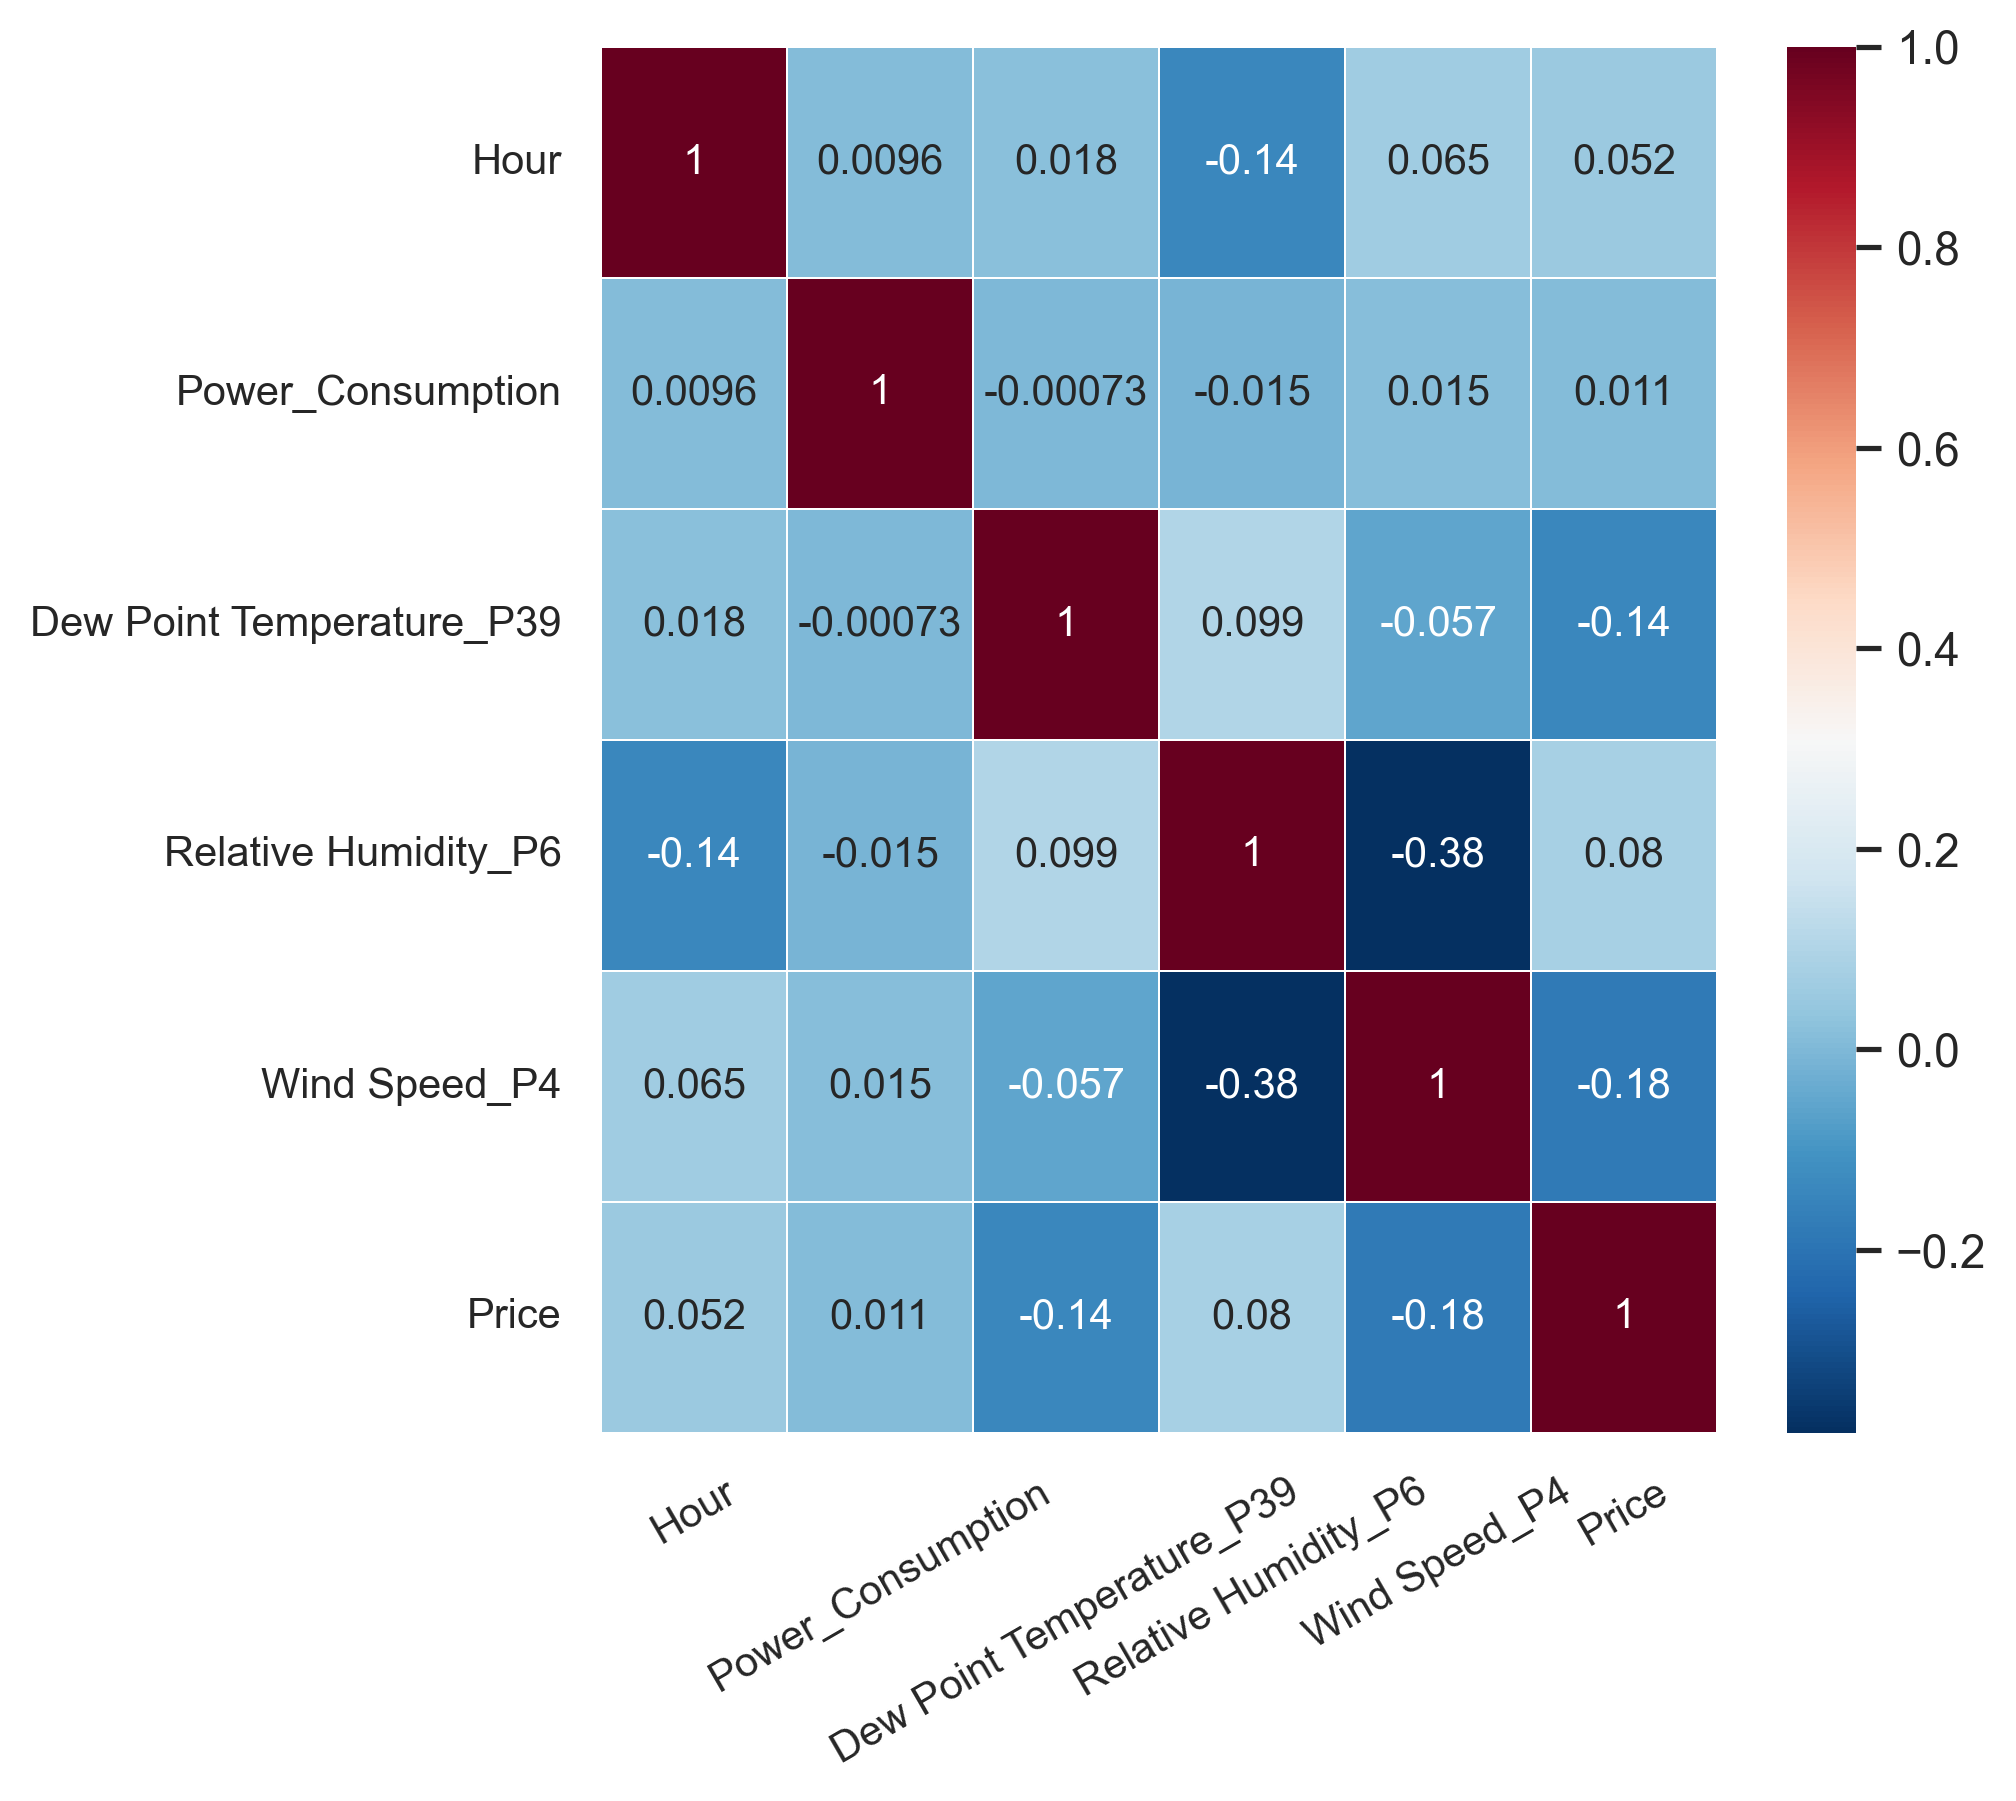

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure with your specified size and resolution
f, ax = plt.subplots(figsize=(6, 6), dpi=300)

# Generate the heatmap with annotations and the Red-Blue reversed colormap
sns.heatmap(correlation_matrix_commercial, cmap='RdBu_r', linewidths=0.1, annot=True, annot_kws={"fontsize":10}, ax=ax)

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save the figure with a high DPI, tight layout, and small padding as per your requirements
#plt.savefig('figures/pearson_corr_commercial.jpg', dpi=300, bbox_inches='tight', pad_inches=0.02)

# Display the heatmap
plt.show()

# Alias the column names for better visualization

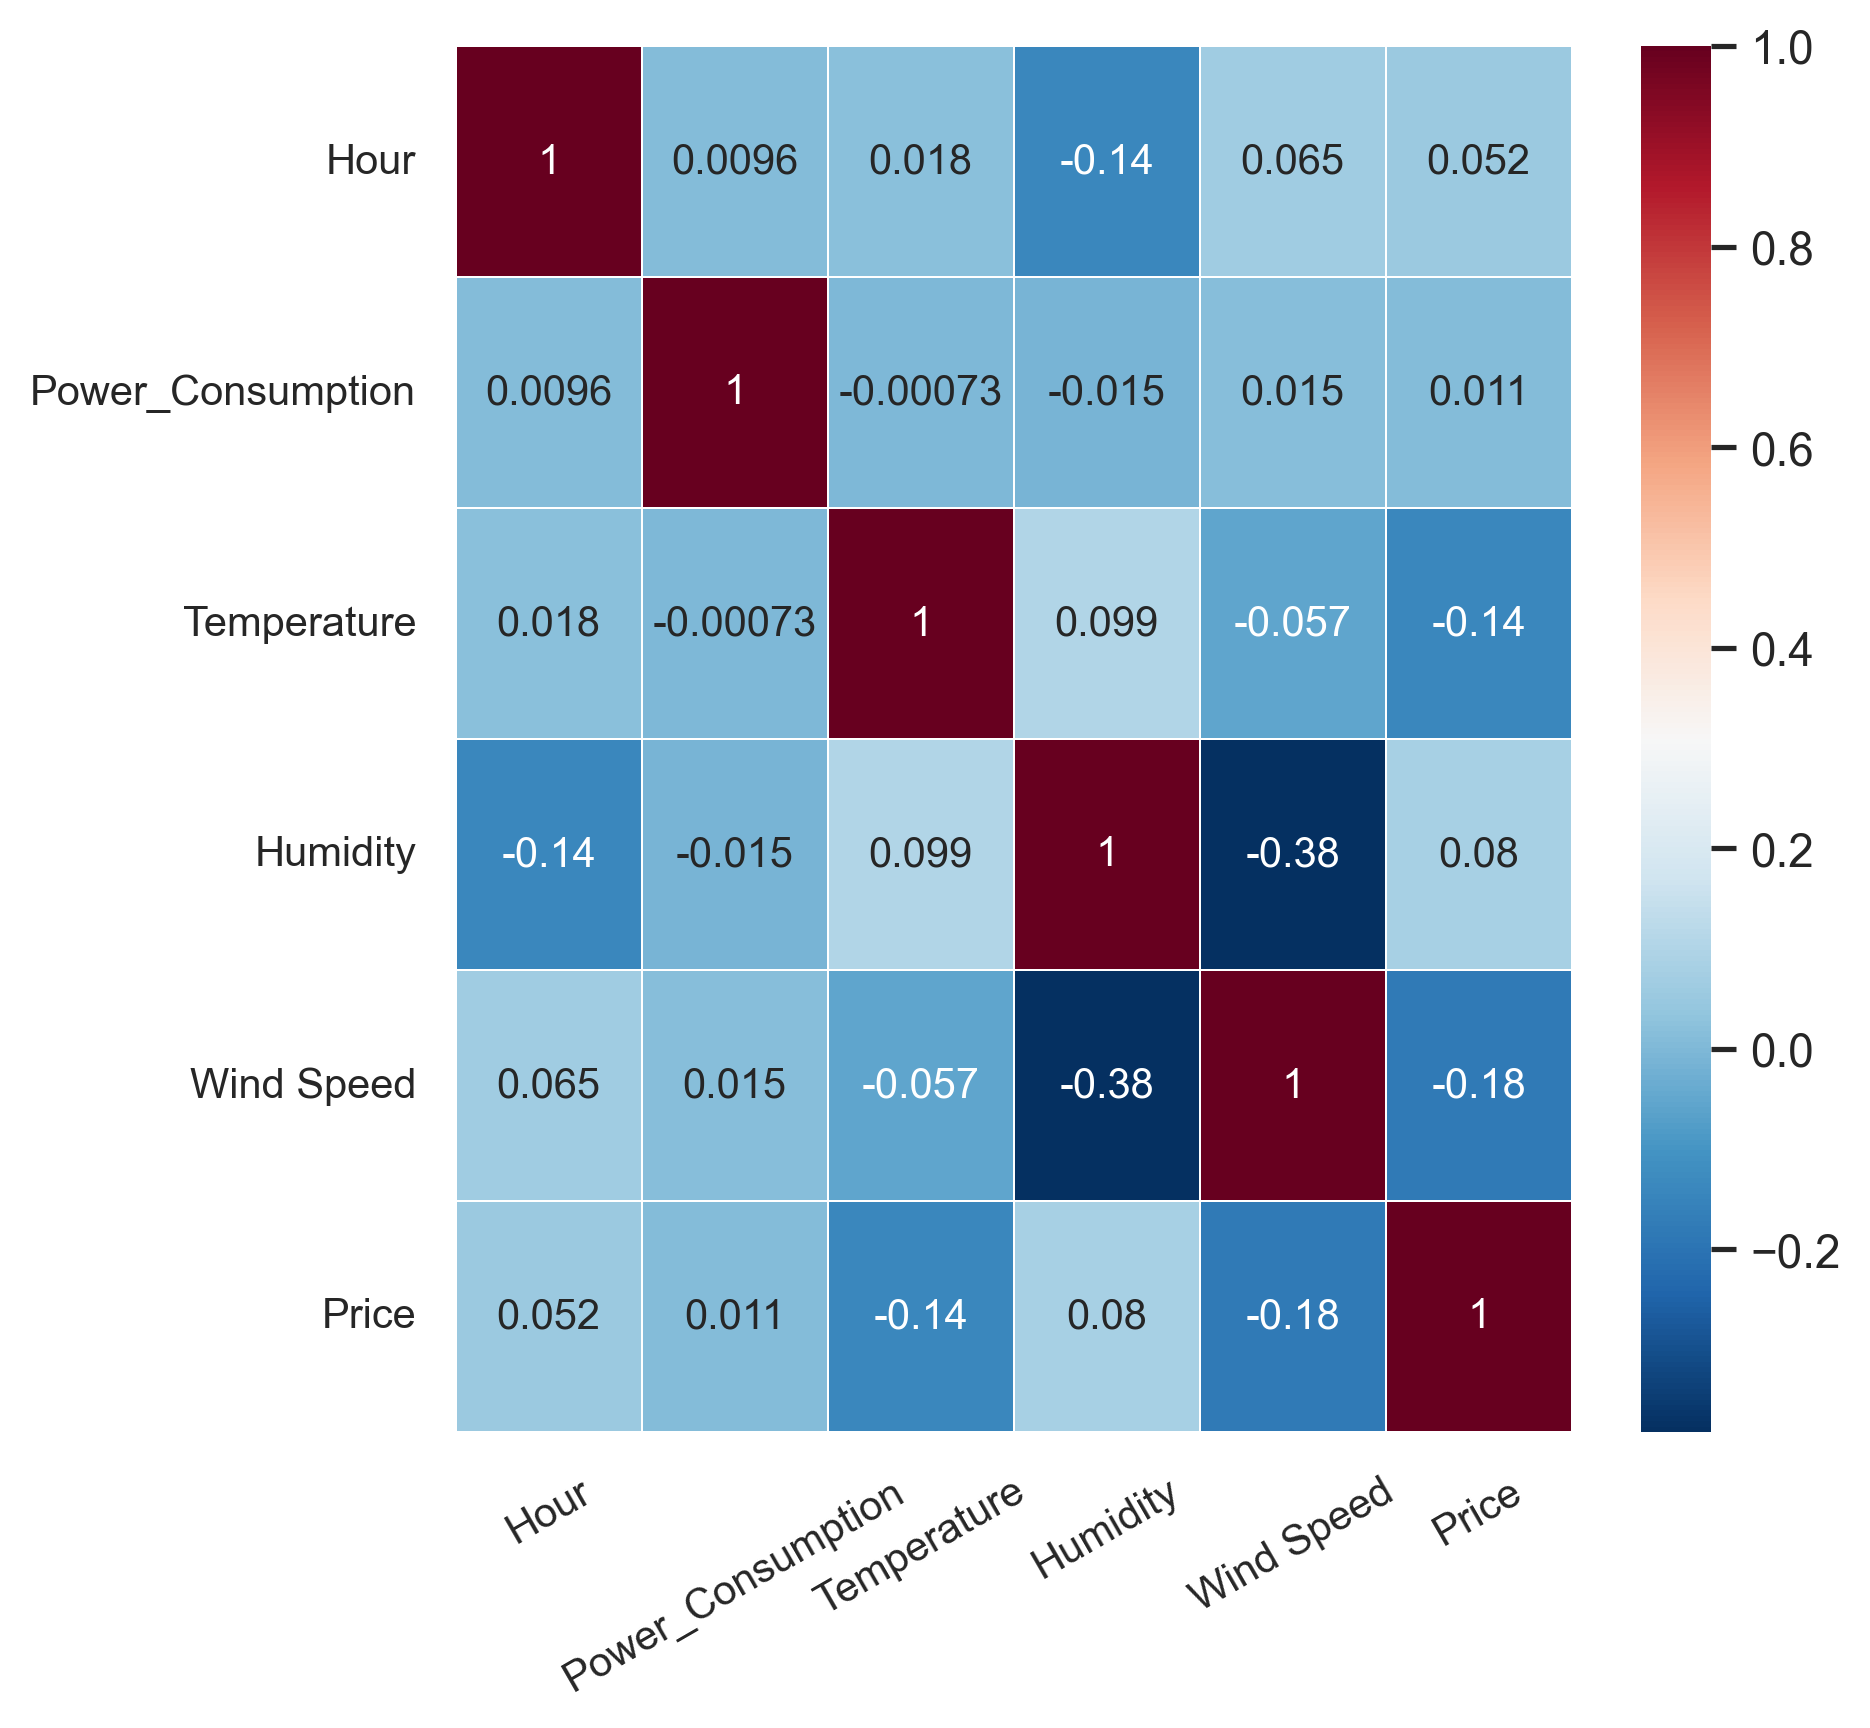

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with your current column names as keys and the desired aliases as values
column_aliases = {
    'Dew Point Temperature_P39': 'Temperature',
    'Relative Humidity_P6': 'Humidity',
    'Wind Speed_P4': 'Wind Speed'
}

# Rename the columns in your correlation matrix
corr_commercial_renamed = correlation_matrix_commercial.rename(columns=column_aliases, index=column_aliases)

# Now, plot the heatmap with the renamed columns
f, ax = plt.subplots(figsize=(6, 6), dpi=300)
sns.heatmap(corr_commercial_renamed, cmap='RdBu_r', linewidths=0.1, annot=True, annot_kws={"fontsize":10}, ax=ax)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save the figure as before
plt.savefig('figures/pearson_corr_commercial_aliased.jpg', dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()


# Second we see the Residential dataframe

In [17]:
residential_df['Hour'] = pd.to_datetime(residential_df['DateTime']).dt.hour
correlation_matrix_residential = residential_df[['Hour', 'Power_Consumption', 'Dew Point Temperature_P39', 'Relative Humidity_P6', 'Wind Speed_P4', 'Price']].corr('pearson')
print(correlation_matrix_residential)

/var/folders/bl/02tnlb3j63n87b_hctf4mh380000gq/T/ipykernel_3403/1166353235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Hour'] = pd.to_datetime(residential_df['DateTime']).dt.hour


                               Hour  Power_Consumption  \
Hour                       1.000000           0.063372   
Power_Consumption          0.063372           1.000000   
Dew Point Temperature_P39  0.019869          -0.098880   
Relative Humidity_P6      -0.139323          -0.003016   
Wind Speed_P4              0.063834           0.028499   
Price                      0.057036           0.052893   

                           Dew Point Temperature_P39  Relative Humidity_P6  \
Hour                                        0.019869             -0.139323   
Power_Consumption                          -0.098880             -0.003016   
Dew Point Temperature_P39                   1.000000              0.089999   
Relative Humidity_P6                        0.089999              1.000000   
Wind Speed_P4                              -0.050840             -0.393777   
Price                                      -0.303569              0.115526   

                           Wind Speed_P4     P

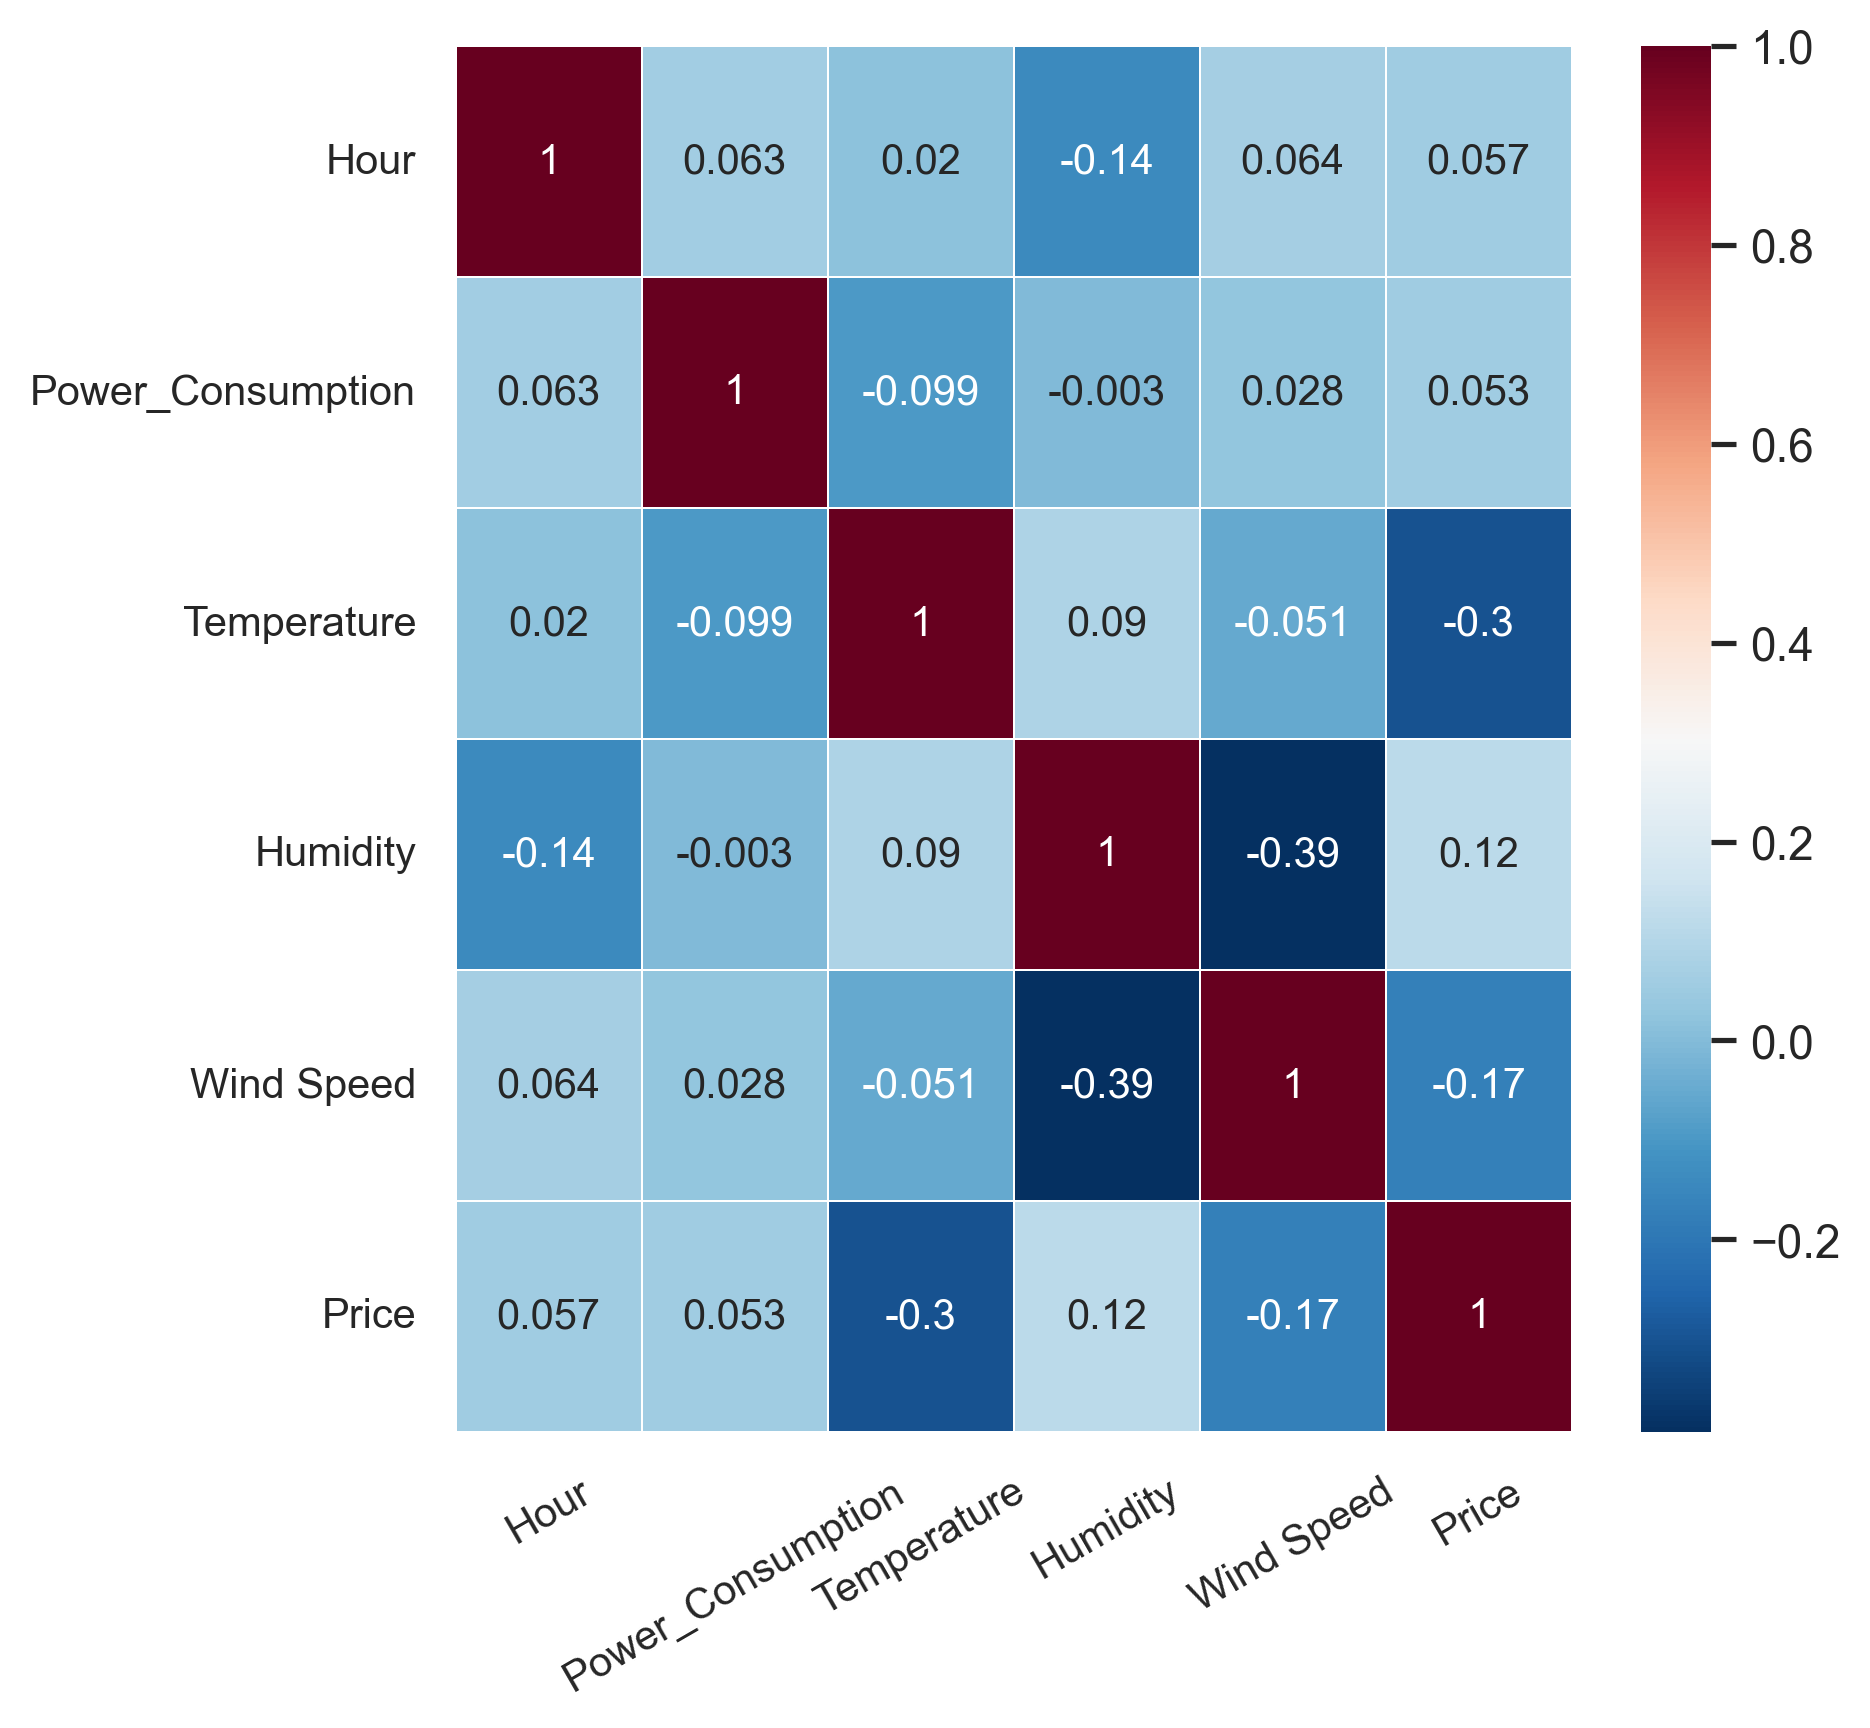

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with your current column names as keys and the desired aliases as values
column_aliases = {
    'Dew Point Temperature_P39': 'Temperature',
    'Relative Humidity_P6': 'Humidity',
    'Wind Speed_P4': 'Wind Speed'
}

# Rename the columns in your correlation matrix
corr_residential_renamed = correlation_matrix_residential.rename(columns=column_aliases, index=column_aliases)

# Now, plot the heatmap with the renamed columns
f, ax = plt.subplots(figsize=(6, 6), dpi=300)
sns.heatmap(corr_residential_renamed, cmap='RdBu_r', linewidths=0.1, annot=True, annot_kws={"fontsize":10}, ax=ax)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save the figure as before
plt.savefig('figures/pearson_corr_residential_aliased.jpg', dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()

# Lets see the correlation of interval of time (TimeOfDay) with the features
### To analyze the correlation between time intervals and other features, you'll first need to create a categorical variable representing these intervals from your DateTime column. Then you can calculate the correlation of these intervals with the other features. Here's how to approach this:

    Create a new column for the time of day intervals.
    One-hot encode this new categorical column.
    Calculate the correlation of these one-hot encoded time intervals with the other features.


/var/folders/bl/02tnlb3j63n87b_hctf4mh380000gq/T/ipykernel_3403/176672353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['TimeOfDay'] = commercial_df['Hour'].apply(assign_time_of_day)


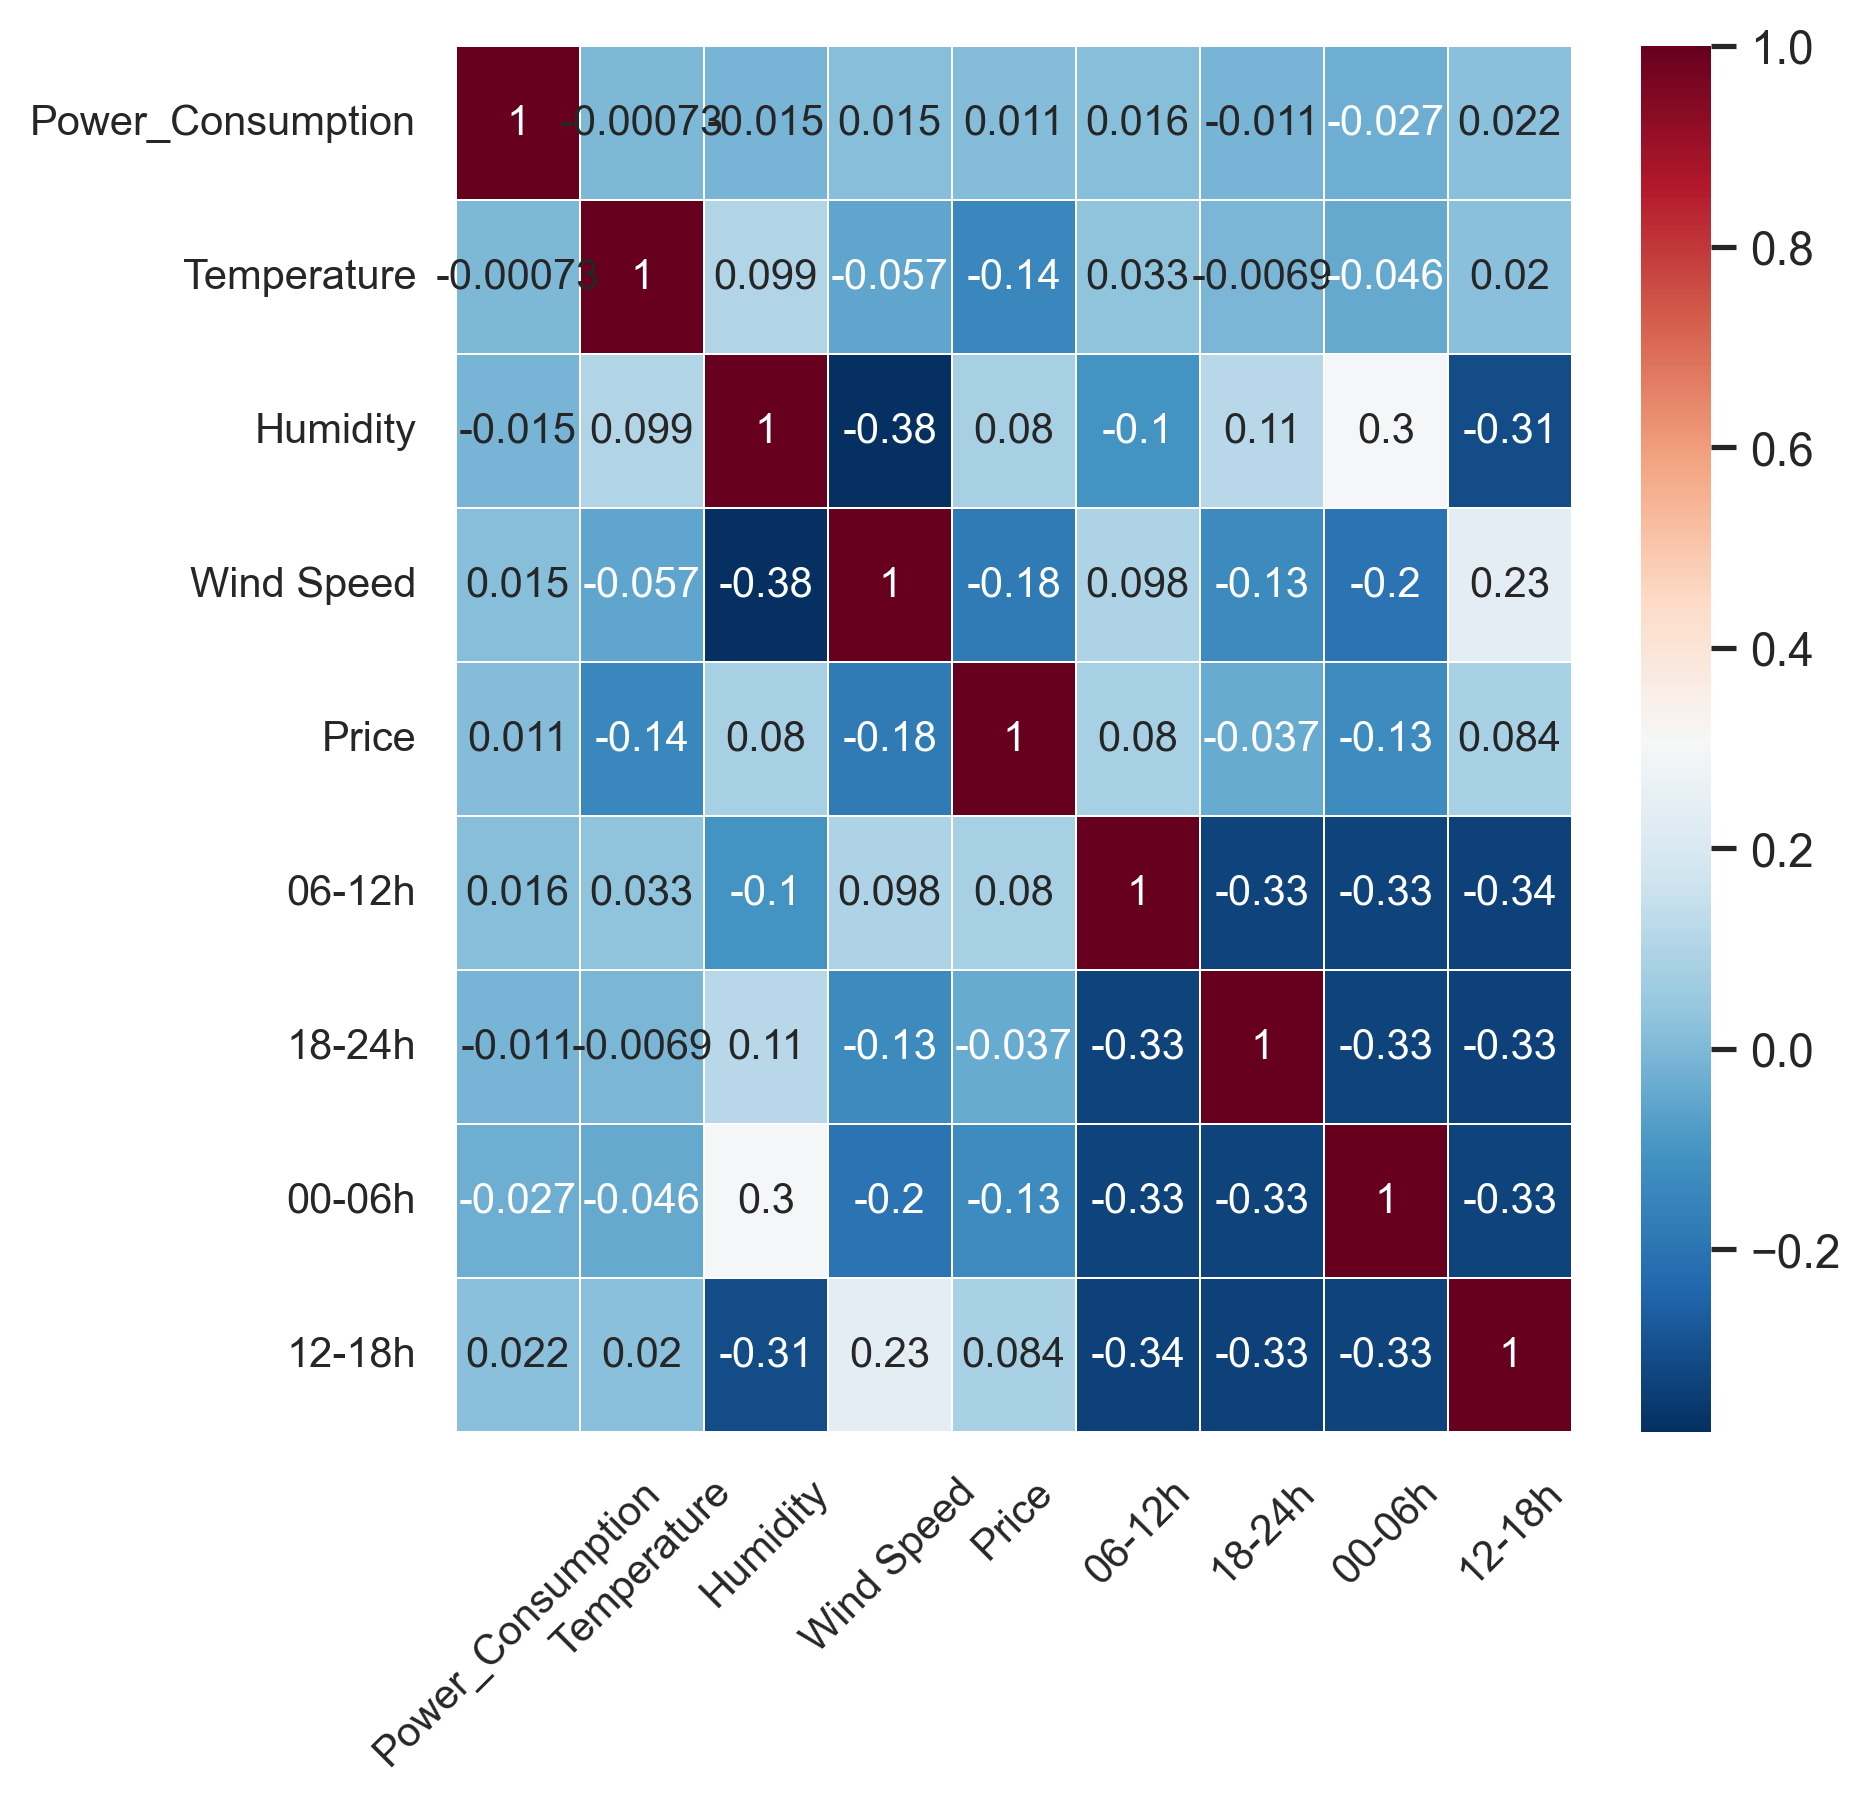

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to categorize hours into intervals
def assign_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Midnight to 6 am'
    elif 6 <= hour < 12:
        return '6 am to Noon'
    elif 12 <= hour < 18:
        return 'Noon to 6 pm'
    else:  # from 18 to 24
        return '6 pm to Midnight'

# Apply the function to create a new categorical column
commercial_df['TimeOfDay'] = commercial_df['Hour'].apply(assign_time_of_day)

# Now we create dummy variables for these intervals
time_of_day_dummies = pd.get_dummies(commercial_df['TimeOfDay'])

# Join the dummy variables to the original DataFrame
commercial_df = commercial_df.join(time_of_day_dummies)

# Select the columns we want to see in the correlation matrix
correlation_columns = ['Power_Consumption', 'Dew Point Temperature_P39', 'Relative Humidity_P6', 'Wind Speed_P4', 'Price']
correlation_columns.extend(time_of_day_dummies.columns.tolist())

# Calculate the Pearson correlation matrix
correlation_matrix_commercial = commercial_df[correlation_columns].corr('pearson')

# Create aliases for the original long column names
column_aliases = {
    'Dew Point Temperature_P39': 'Temperature',
    'Relative Humidity_P6': 'Humidity',
    'Wind Speed_P4': 'Wind Speed',
    'Midnight to 6 am': '00-06h',
    '6 am to Noon': '06-12h',
    'Noon to 6 pm': '12-18h',
    '6 pm to Midnight': '18-24h'
}

# Rename the columns in your correlation matrix
corr_commercial_renamed = correlation_matrix_commercial.rename(columns=column_aliases, index=column_aliases)

# Plot the heatmap with the renamed columns
f, ax = plt.subplots(figsize=(6, 6), dpi=300)
sns.heatmap(corr_commercial_renamed, cmap='RdBu_r', linewidths=0.1, annot=True, annot_kws={"fontsize":10}, ax=ax)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save the figure
plt.savefig('figures/pearson_corr_commercial_timeofday.jpg', dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()



/var/folders/bl/02tnlb3j63n87b_hctf4mh380000gq/T/ipykernel_3403/504002435.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['TimeOfDay'] = residential_df['Hour'].apply(assign_time_of_day)


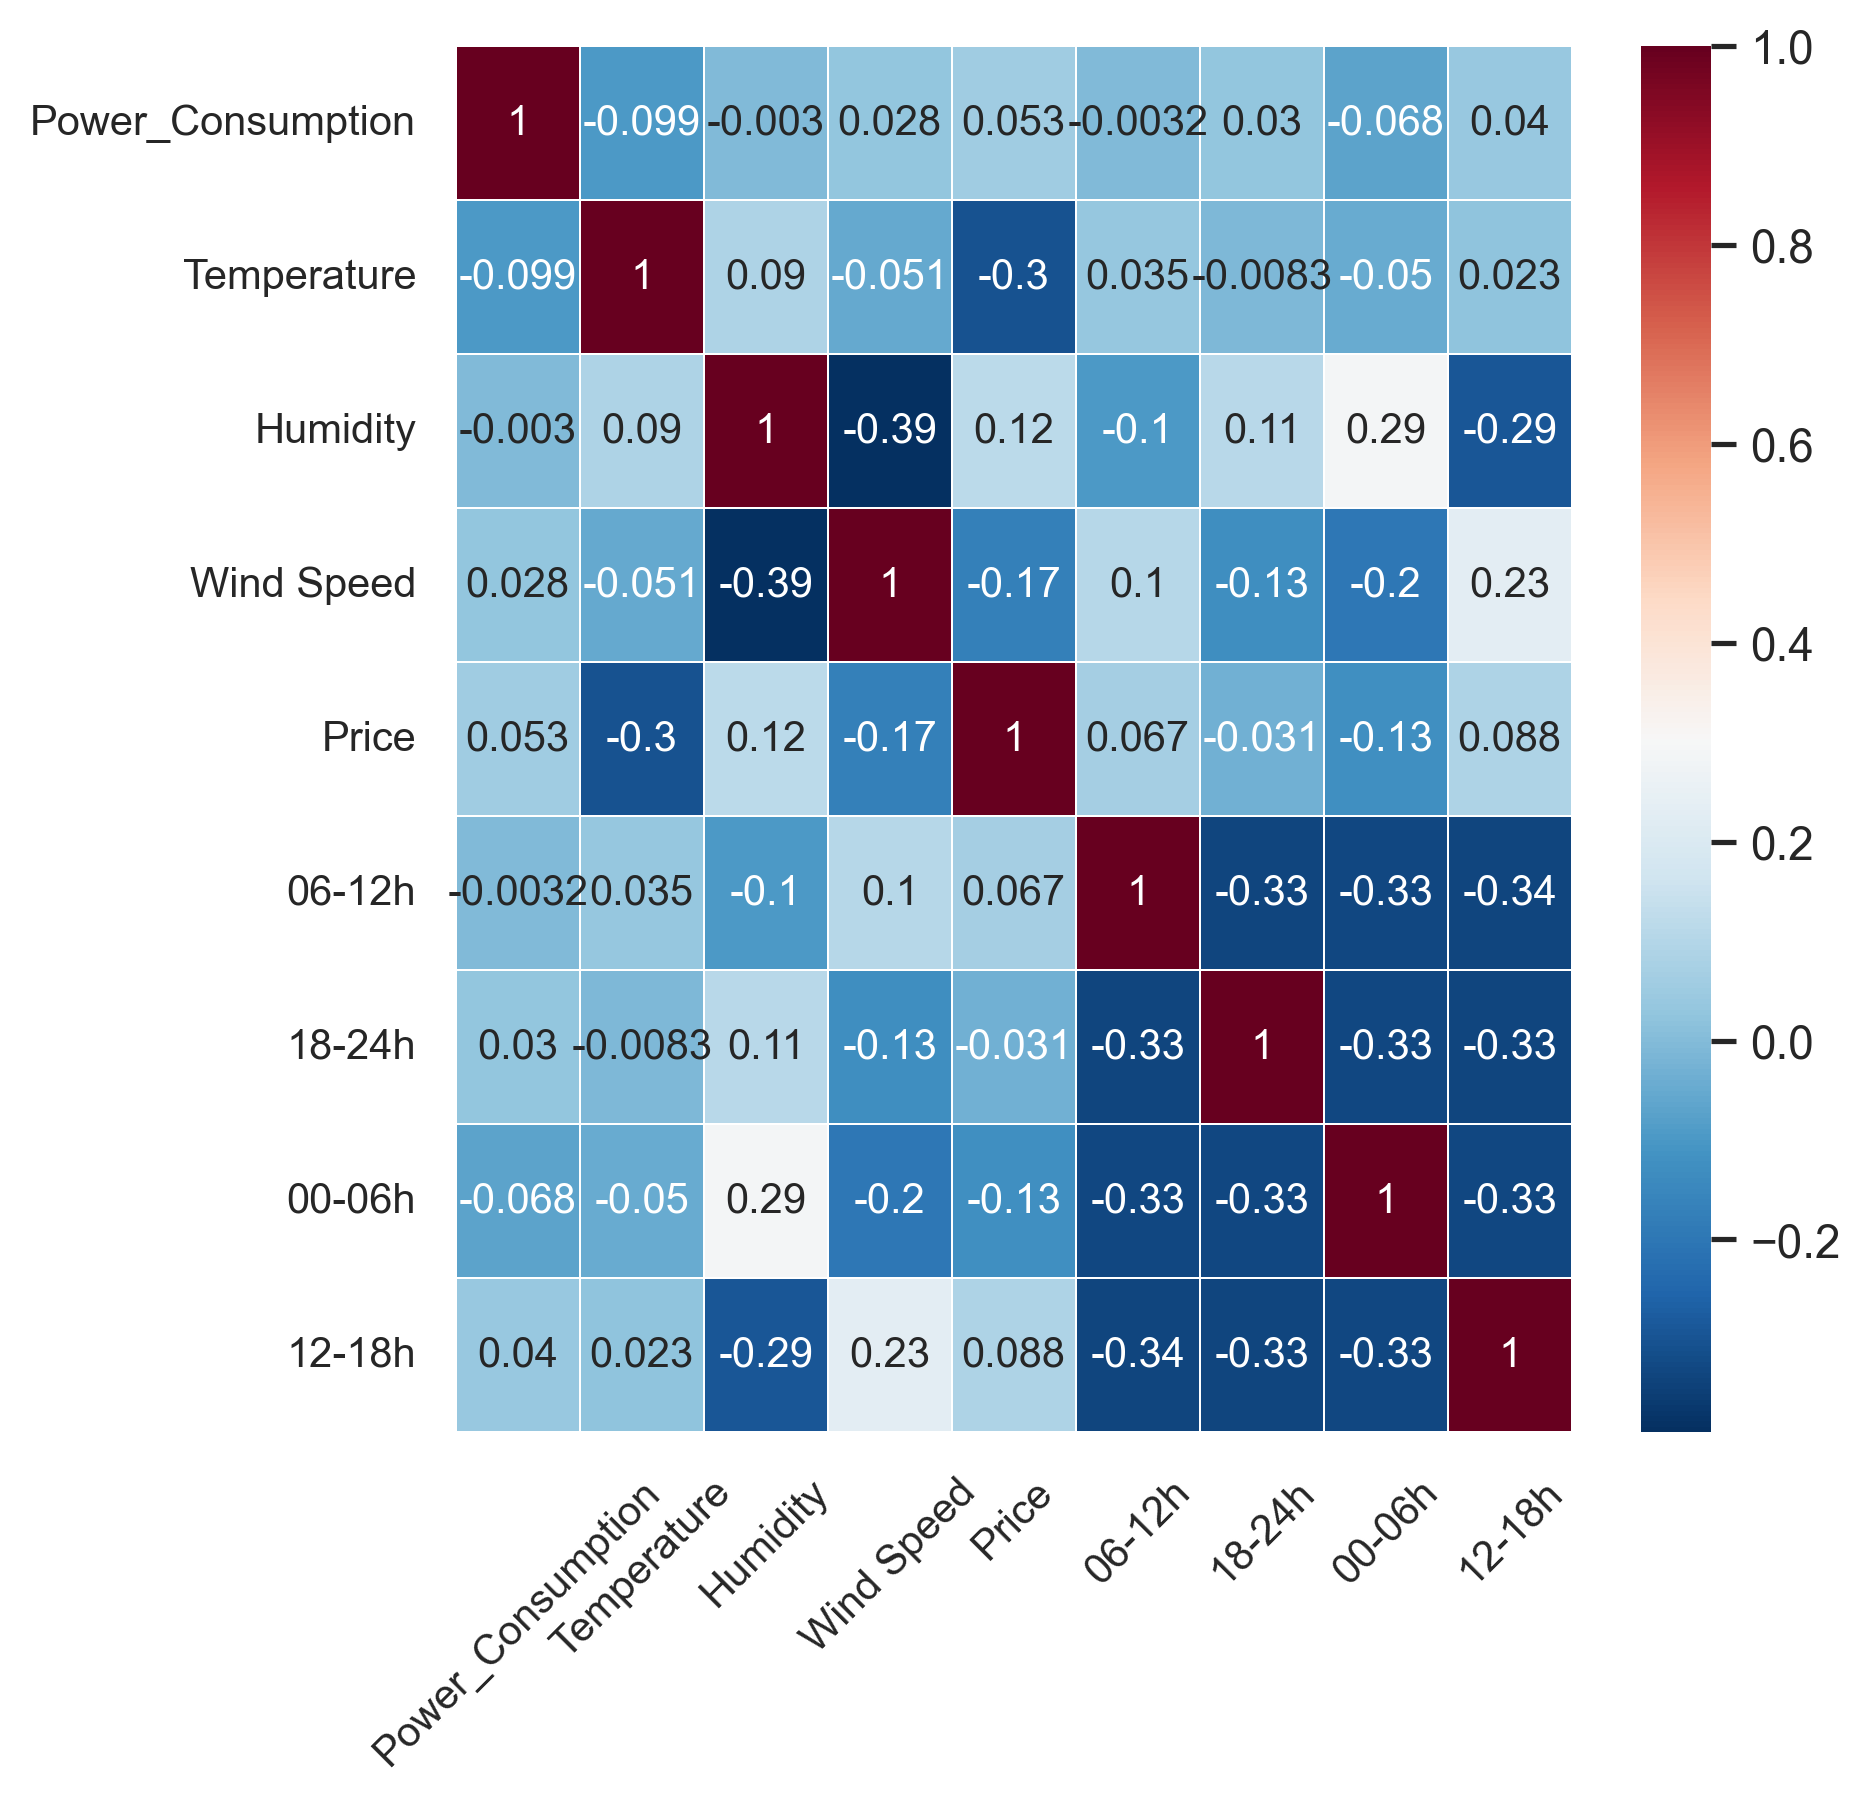

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to categorize hours into intervals
def assign_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Midnight to 6 am'
    elif 6 <= hour < 12:
        return '6 am to Noon'
    elif 12 <= hour < 18:
        return 'Noon to 6 pm'
    else:  # from 18 to 24
        return '6 pm to Midnight'

# Apply the function to create a new categorical column
residential_df['TimeOfDay'] = residential_df['Hour'].apply(assign_time_of_day)

# Now we create dummy variables for these intervals
time_of_day_dummies = pd.get_dummies(residential_df['TimeOfDay'])

# Join the dummy variables to the original DataFrame
residential_df = residential_df.join(time_of_day_dummies)

# Select the columns we want to see in the correlation matrix
correlation_columns = ['Power_Consumption', 'Dew Point Temperature_P39', 'Relative Humidity_P6', 'Wind Speed_P4', 'Price']
correlation_columns.extend(time_of_day_dummies.columns.tolist())

# Calculate the Pearson correlation matrix
correlation_matrix_residential = residential_df[correlation_columns].corr('pearson')

# Create aliases for the original long column names
column_aliases = {
    'Dew Point Temperature_P39': 'Temperature',
    'Relative Humidity_P6': 'Humidity',
    'Wind Speed_P4': 'Wind Speed',
    'Midnight to 6 am': '00-06h',
    '6 am to Noon': '06-12h',
    'Noon to 6 pm': '12-18h',
    '6 pm to Midnight': '18-24h'
}

# Rename the columns in your correlation matrix
corr_residential_renamed = correlation_matrix_residential.rename(columns=column_aliases, index=column_aliases)

# Plot the heatmap with the renamed columns
f, ax = plt.subplots(figsize=(6, 6), dpi=300)
sns.heatmap(corr_residential_renamed, cmap='RdBu_r', linewidths=0.1, annot=True, annot_kws={"fontsize":10}, ax=ax)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save the figure
plt.savefig('figures/pearson_corr_residential_timeofday.jpg', dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()

# Model for Commercial Data

In [25]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.3 MB/s eta 0:00:00a 0:00:01


In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100


# Create aliases for the original long column names
column_aliases = {
    'Dew Point Temperature_P39': 'Temperature',
    'Relative Humidity_P6': 'Humidity',
    'Wind Speed_P4': 'Wind Speed',
    # Assuming you have already created the time interval dummy variables
    'Midnight to 6 am': '00-06h',
    '6 am to Noon': '06-12h',
    'Noon to 6 pm': '12-18h',
    '6 pm to Midnight': '18-24h'
}

# Rename the columns in your DataFrame
commercial_df = commercial_df.rename(columns=column_aliases)

# Prepare the features (X) and target (y)
X = commercial_df[['Temperature', 'Humidity', 'Wind Speed', 'Price', '06-12h', '18-24h', '00-06h', '12-18h']]
y = commercial_df['Power_Consumption']

# Split the data into training, validation, and test sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Instantiate an XGBoost regressor object with early_stopping_rounds in the constructor
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=3,
    alpha=10,
    n_estimators=50,
    early_stopping_rounds=10
)

# Fit the regressor to the training set and validate using the validation set
xg_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Make predictions on the test set using the best iteration
y_pred = xg_reg.predict(X_test)



# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared: {r_squared:.2f}")

# Note: MAPE can be sensitive to zero values in the target variable, which is why we filter them out.


MSE: 0.00
RMSE: 0.04
MAE: 0.01
MAPE: 5575.90%
R-squared: 0.00


In [34]:
y_test

54143290    0.002602
11962583    0.000158
5872575     0.020400
2059760     0.000000
28486966    0.006420
              ...   
52353136    0.006180
4201357     0.000518
7638528     0.061000
73488330    0.000158
69891653    0.002504
Name: Power_Consumption, Length: 4499483, dtype: float64

In [35]:
y_pred

array([0.00653693, 0.00550199, 0.00819661, ..., 0.00564729, 0.00816469,
       0.00643779], dtype=float32)

# The result was weird because the label (target:power consumption) values were closed to zero and regression could not find a line for separating the values. So, we need to scale the power consumption column values to 0-10.

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Create aliases for the original long column names
column_aliases = {
    'Dew Point Temperature_P39': 'Temperature',
    'Relative Humidity_P6': 'Humidity',
    'Wind Speed_P4': 'Wind Speed',
    # Assuming you have already created the time interval dummy variables
    'Midnight to 6 am': '00-06h',
    '6 am to Noon': '06-12h',
    'Noon to 6 pm': '12-18h',
    '6 pm to Midnight': '18-24h'
}

# Rename the columns in your DataFrame
commercial_df = commercial_df.rename(columns=column_aliases)

# Initialize the MinMaxScaler to scale target values
scaler = MinMaxScaler(feature_range=(0, 10))

# Prepare the features (X) and target (y)
X = commercial_df[['Temperature', 'Humidity', 'Wind Speed', 'Price', '06-12h', '18-24h', '00-06h', '12-18h']]
y = commercial_df['Power_Consumption']

# Scale the target variable (y)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training, validation, and test sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Instantiate an XGBoost regressor object with early_stopping_rounds in the constructor
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=100,
    early_stopping_rounds=10
)

# Fit the regressor to the training set and validate using the validation set
xg_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Make predictions on the test set using the best iteration
y_pred = xg_reg.predict(X_test)

# Scale back the predictions to the original range of Power_Consumption
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Also scale back the y_test for the original scale for evaluation metrics
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate the evaluation metrics using the rescaled values
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
r_squared = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the evaluation metrics
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared: {r_squared:.2f}")


MSE: 0.00
RMSE: 0.04
MAE: 0.01
MAPE: 5536.99%
R-squared: 0.00


# Work with the data 2020 only to get the results of XGBoost model